In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('data/KMeansData.csv')
dataset[:5]

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [3]:
X = dataset.iloc[:,:].values # X = dataset.values와 결과가 같다.
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

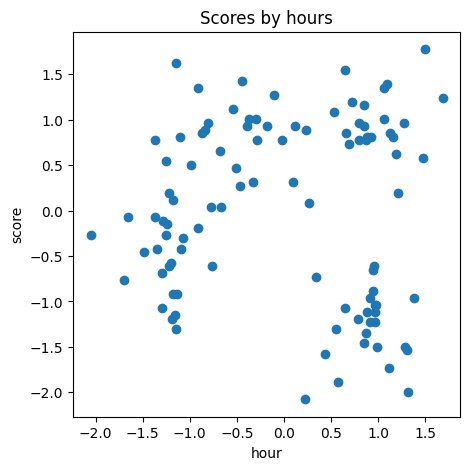

In [28]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Scores by hours')
plt.xlabel('hour')
plt.ylabel('score')
plt.show()


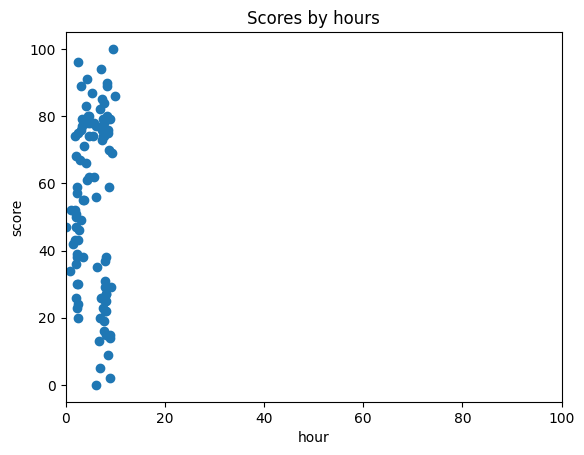

In [5]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(0, 100)
plt.xlim(0, 100)
plt.title('Scores by hours')
plt.xlabel('hour')
plt.ylabel('score')
plt.show()

In [29]:
from sklearn.cluster import KMeans

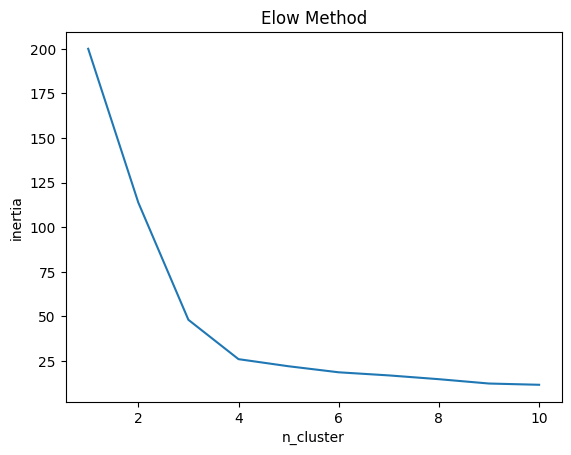

In [30]:
from sklearn.cluster import KMeans
inertia_list = [] #cluster에 속한 점들이 얼마나 가깝게 모여 있는지를 나타내는 값들
for i in range(1, 11):
 #중심점(centroid)을 K-menas++ 방식으로 계산하여 객체를 생성한다. (n_init=10 : 디폴트 수)
 kmenas = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init=10)
 kmenas.fit(X) #학습 후 모델을 생성한다.
 inertia_list.append(kmenas.inertia_) #각 지점으로부터 중심점(centroid)까지의 거리 제곱의 합(inertia)
plt.plot(range(1, 11), inertia_list)
plt.title('Elow Method')
plt.xlabel('n_cluster')
plt.ylabel('inertia')
plt.show()

In [31]:
K = 4
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
y_kmeans = kmeans.fit_predict(X) #X의 점들이 어느 cluster에 속하는지 예측해 본다. 
y_kmeans

array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3], dtype=int32)

In [21]:
X[y_kmeans==0, : ] 

array([[-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537],
       [ 0.09251026,  0.31164246],
       [-0.28531166,  0.77390569],
       [-0.18430976,  0.92799344],
       [-0.50976032,  0.4657302 ],
       [-0.68183762,  0.65833988],
       [-0.98484332,  0.50425214],
       [-0.37135031,  1.00503731],
       [-0.02345489,  0.77390569],
       [-0.39379518,  0.92799344],
       [-0.86887817,  0.85094956],
       [-1.37014685,  0.77390569],
       [-1.10829008,  0.81242763],
       [-0.33020139,  0.31164246],
       [-0.54342762,  1.12060312],
       [-0.46487058,  0.27312053],
       [-1.14195738,  1.62138828],
       [-0.29279328,  1.00503731],
       [-0.44990734,  1.4287786 ],
       [-0.8426925 ,  0.8894715 ],
       [-1.25792252,  0.54277408],
       [ 0.11495512,  0.92799344],
       [-0.10201192,  1.27469086]])

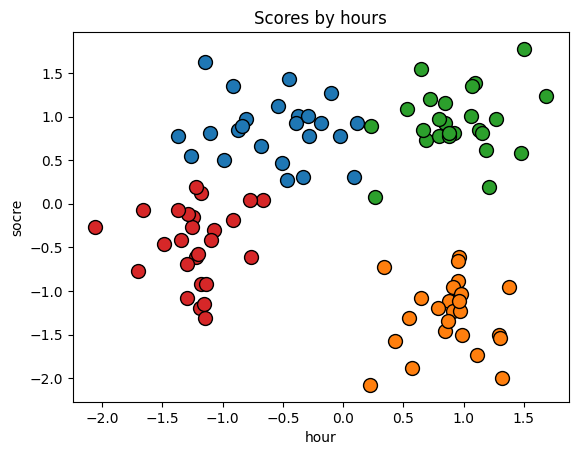

In [32]:
for cluster in range(4): plt.scatter(X[y_kmeans==cluster, 0], X[y_kmeans==cluster, 1], s=100, edgecolor='black')
plt.title('Scores by hours')
plt.xlabel('hour')
plt.ylabel('socre')
plt.show()

In [33]:
centers = kmeans.cluster_centers_
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

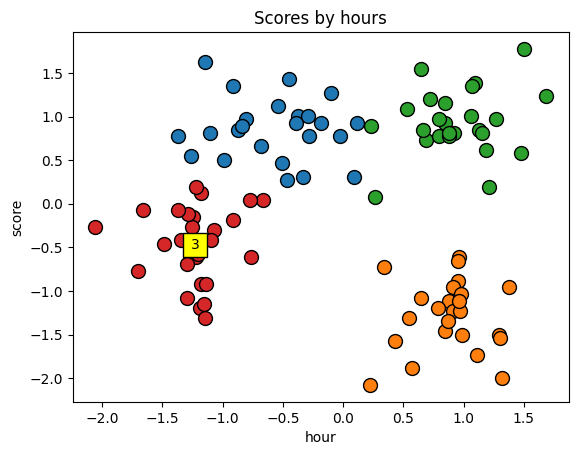

In [35]:
for cluster in range(4): plt.scatter(X[y_kmeans==cluster, 0], X[y_kmeans==cluster, 1], s=100, edgecolor='black')
plt.scatter(centers[cluster, 0], centers[cluster, 1], 
 s=300, edgecolor='black', color='yellow', marker='s')
plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va='center', ha='center')
plt.title('Scores by hours')
plt.xlabel('hour')
plt.ylabel('score')
plt.show()


In [36]:
X_org = sc.inverse_transform(X)
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [37]:
centers_org = sc.inverse_transform(centers)
centers_org

array([[ 3.96458333, 76.08333333],
       [ 7.8552    , 20.96      ],
       [ 8.0084    , 78.2       ],
       [ 2.21269231, 41.76923077]])

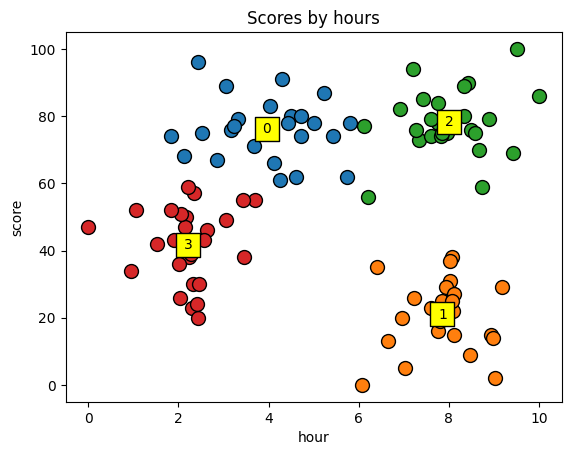

In [38]:
for cluster in range(4):
 plt.scatter(X_org[y_kmeans==cluster, 0], X_org[y_kmeans==cluster, 1], 
 s=100, edgecolor='black')
 plt.scatter(centers_org[cluster,0], centers_org[cluster,1], 
 s=300, edgecolor='black', color='yellow', marker='s')
 plt.text(centers_org[cluster,0], centers_org[cluster,1], cluster, va='center', ha='center')
plt.title('Scores by hours')
plt.xlabel('hour')
plt.ylabel('score')
plt.show()